In [1]:
import sys
import nltk
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#DSLCC-v1.0
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v1.0/train.txt
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v1.0/devel.txt
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v1.0/test-gold.txt

#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v1.0/train-eng.txt
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v1.0/devel-eng.txt
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v1.0/test-eng-gold.txt

#DSLCC-v2.0
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v2.0/train.txt
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v2.0/devel.txt
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v2.0/test-ne-gold.txt
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v2.0/test-none-gold.txt

#DSLCC-v4.0
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v2.0/DSL-TRAIN.txt
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v2.0/DSL-DEV.txt
#/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v2.0/DSL-TEST-GOLD.txt

### Read train and test file.

In [2]:
file_train = input("Enter train file name:")
file_dev_test = input("Enter dev test file name:")
file_test = input("Enter test file name:")

Enter train file name:/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v1.0/train.txt
Enter dev test file name:/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v1.0/devel.txt
Enter test file name:/Users/sudhirsingh/Desktop/Final NLP Term project/dataset/DSLCC-v1.0/test-gold.txt


# Test on train dataset

In [3]:
print(len(file_train))
print(len(file_dev_test))
print(len(file_test))

78
78
82


### Open file and preprocess

In [4]:
def read_file_and_preprocess(file_name):
    data = open(file_name).read()
    texts, labels = [], []
    for idx, line in enumerate(data.split("\n")):
        line_contents = line.split('\t')
        if any(line_contents):
            line = line_contents[0]
            line = line.replace(".", "")
            line = line.translate(str.maketrans('','','1234567890'))
            line = line.translate(str.maketrans('', '', string.punctuation))
            line = line.translate(str.maketrans('', '', '#NE#'))          
            line = line.replace('"', '')
            line = line.replace('\n', '')
            line = line.strip()
            texts.append(line)
            labels.append(line_contents[1])
    return texts, labels

### Read split train and dev data in X, y train & dev test.

In [5]:
X_train, y_train = read_file_and_preprocess(file_train)
X_dev_test, y_dev_test = read_file_and_preprocess(file_dev_test)
# test_texts, test_classes = read_file_and_preprocess(file_test)

In [6]:
def unique_class_label(y_train):
    return list(set(y_train))

In [7]:
train_unique_class = unique_class_label(y_train)

In [8]:
print(train_unique_class)

['sk', 'my', 'pt-PT', 'es-AR', 'pt-BR', 'cz', 'id', 'hr', 'es-ES', 'en-US', 'en-GB', 'sr', 'bs']


In [9]:
print(X_train[0])
print(y_train[0])

novembra je teretni brod s turskom zastavom sa  ilegalnih imigranata bezbjedno dovučen do grčke obale nakon što je uhvaćen na nemirnom moru u blizini jugoistočne obale Grčke
bs


In [10]:
print(X_dev_test[0])
print(y_dev_test[0])

godišnja Olta Boka osvojila je glavnu nagradu na  acionalnom festivalu pjesme u Albaniji održanom u Tirani tokom tri dana s početkom u petak  decembra
bs


### Function to print each line for each language

In [11]:
def print_line_each_language(X, y):
    unique_lang = set()
    for line, l_code in zip(X, y):
        if l_code not in unique_lang:
            unique_lang.add(l_code)
            print(line + "\t" + l_code)


### print each line for each language of training set

In [12]:
# print_line_each_language(X_train, y_train)

### print each line for each language of dev test set

In [13]:
# print_line_each_language(X_dev_test, y_dev_test)

### Feature extraction and modeling

In [14]:
def feature_extraction_and_modeling(X_train, X_test, feature="tf-idf", ngram=1):
#     feature_type = feature
    if feature == "tf-idf":
        # ngram level tf-idf 
#         min_df=0.01,max_df = 0.95,
        word_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,ngram), max_df = 0.95, max_features=None)
#         word_vectorizer = CountVectorizer(max_features=None)
    
        word_vectorizer_X_train = word_vectorizer.fit_transform(X_train)
        tf_idf_transformer = TfidfTransformer()
        X_train_feature_matrix = tf_idf_transformer.fit_transform(word_vectorizer_X_train)
        
        word_vectorizer_X_test = word_vectorizer.transform(X_test)
        tf_idf_transformer = TfidfTransformer()
        X_test_feature_matrix = tf_idf_transformer.fit_transform(word_vectorizer_X_test)
        
        
#         count_vector = CountVectorizer()
#         # create tf-idf vector object 
#         tf_idf_vector_ngram = TfidfVectorizer(analyzer='word', ngram_range=(1,ngram), max_df=0.95, max_features=None)
#         # fit (create matrix) the tf-idf vector object according to data
#         tf_idf_vector_ngram.fit(X_train)
        
# #         print(dict(zip(tf_idf_vector_ngram.get_feature_names(), tf_idf_vector_ngram.idf_)))
# #         print(tf_idf_vector_ngram.get_feature_names())
        
#         # transform data using tf-idf vector object
#         X_train_feature_matrix = tf_idf_vector_ngram.transform(X_train)
#         X_test_feature_matrix = tf_idf_vector_ngram.transform(X_test)
        return X_train_feature_matrix, X_test_feature_matrix
    else:
#         # create count vector object 
        count_vector = CountVectorizer(analyzer='word', ngram_range=(1,ngram), max_df=0.95, max_features=None)
#         # fit (create matrix) the count vector object according to data
        count_vector.fit(X_train)
#         print(count_vector.get_feature_names())
#         print("Vocabulary content:\n {}".format(count_vector.vocabulary_))

#         # transform data using count vector object
        X_train_feature_matrix = count_vector.transform(X_train)
        X_test_feature_matrix = count_vector.transform(X_test)
        return X_train_feature_matrix, X_test_feature_matrix

In [15]:
X_train_tf_idf_ngram, X_dev_test_tf_idf_ngram = feature_extraction_and_modeling(X_train, X_dev_test, feature="tf-idf", ngram=2)


In [16]:
X_train_tf_idf_ngram[0]

<1x4710033 sparse matrix of type '<class 'numpy.float64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [17]:
X_dev_test_tf_idf_ngram[0]

<1x4710033 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

### Naive Bayes model

In [18]:
def train_model_naive_bayes(X, y):
    ros = RandomOverSampler(random_state=None)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    nb_classifier = MultinomialNB(alpha=1.0, fit_prior=True)
    nb_classifier.fit(X_resampled, y_resampled)
    return nb_classifier

### Linear SVM model

In [19]:
def train_model_LinearSVC(X, y):
    ros = RandomOverSampler(random_state=None)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    svm_classifier = LinearSVC(random_state=None)
    svm_classifier.fit(X_resampled, y_resampled)
    return svm_classifier

### Logistic Regression model

In [20]:
def train_model_LogisticRegression(X, y):
    ros = RandomOverSampler(random_state=None)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    lr_classifier = LogisticRegression(n_jobs=1, random_state=0, C=1e5, solver='lbfgs', max_iter=10000, multi_class='multinomial')
    lr_classifier.fit(X_resampled, y_resampled)
    return lr_classifier

### Testing the data with model

In [21]:
def test_data_with_model(model, X, y):
    prediction = model.predict(X)
    accuracy = model.score(X, y)
    return prediction, accuracy

### Function to print confusion matrix and classification report

In [22]:
def matrix_and_report(y_test, y_pred, unique_class):
    tf_idf_ngram_cm = metrics.confusion_matrix(y_test, y_pred, labels=unique_class)
    figure, axis = plt.subplots(figsize=(10,10))
    axis.set_title('Confusion matrix')
    sns.heatmap(tf_idf_ngram_cm, annot=True, fmt='d', xticklabels=unique_class, yticklabels=unique_class)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print("--------------------------------------------------------------------------")
    print("Confusion matrix, without normalization")
    print(metrics.confusion_matrix(y_test, y_pred, labels=unique_class))
    plt.show()
    print("--------------------------------------------------------------------------")
    print("Classification Report")
    print(metrics.classification_report(y_test, y_pred, labels=unique_class))
    print("--------------------------------------------------------------------------")

In [23]:
nb_model = train_model_naive_bayes(X_train_tf_idf_ngram, y_train)

In [24]:
nb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Using Naive Bayes: Test and make prediction of train data

In [25]:
nb_prediction, nb_accuracy = test_data_with_model(nb_model, X_dev_test_tf_idf_ngram, y_dev_test)

In [26]:
# for y_test, y_test_predict in zip(y_dev_test, nb_prediction):
#     if y_test != y_test_predict:
#         print(y_test + "\t" + y_test_predict)

### Using Naive Bayes: Accuracy of predicted train data

In [27]:
print("Multinomial Naive Bayes classifier accuracy score for test set=%0.4f" % nb_accuracy)

Multinomial Naive Bayes classifier accuracy score for test set=0.8708


### Multinomial Naive Bayes - Confusion matrix and classification report of train data

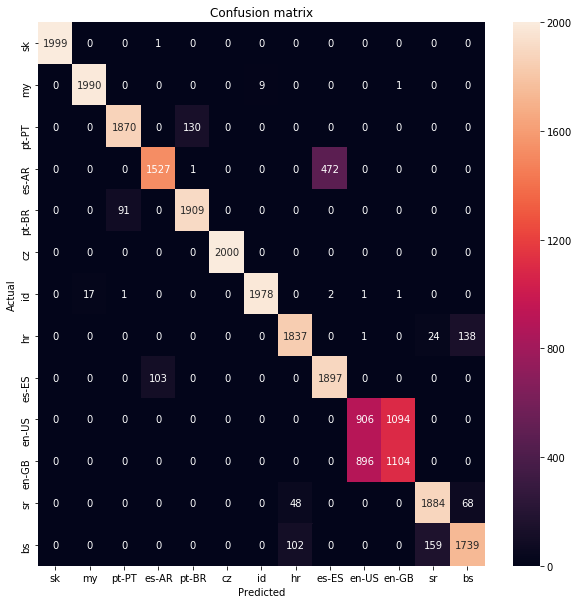

--------------------------------------------------------------------------
Confusion matrix, without normalization
[[1999    0    0    1    0    0    0    0    0    0    0    0    0]
 [   0 1990    0    0    0    0    9    0    0    0    1    0    0]
 [   0    0 1870    0  130    0    0    0    0    0    0    0    0]
 [   0    0    0 1527    1    0    0    0  472    0    0    0    0]
 [   0    0   91    0 1909    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 2000    0    0    0    0    0    0    0]
 [   0   17    1    0    0    0 1978    0    2    1    1    0    0]
 [   0    0    0    0    0    0    0 1837    0    1    0   24  138]
 [   0    0    0  103    0    0    0    0 1897    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  906 1094    0    0]
 [   0    0    0    0    0    0    0    0    0  896 1104    0    0]
 [   0    0    0    0    0    0    0   48    0    0    0 1884   68]
 [   0    0    0    0    0    0    0  102    0    0    0  159 1739]]


In [28]:
matrix_and_report(y_dev_test, nb_prediction, train_unique_class)

In [29]:
svm_model = train_model_LinearSVC(X_train_tf_idf_ngram, y_train)

In [30]:
svm_model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Using Linear SVM: Test and make prediction of train data

In [31]:
svm_prediction, svm_accuracy = test_data_with_model(svm_model, X_dev_test_tf_idf_ngram, y_dev_test)

### Using Linear SVM: Accuracy of predicted train data

In [32]:
print("Linear SVM classifier accuracy score for test set=%0.4f" % svm_accuracy)

Linear SVM classifier accuracy score for test set=0.8746


### Linear SVM - Confusion matrix and classification report of train data

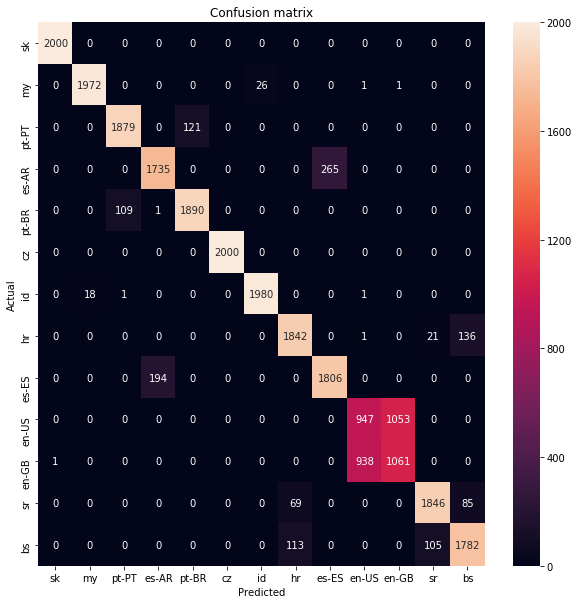

--------------------------------------------------------------------------
Confusion matrix, without normalization
[[2000    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1972    0    0    0    0   26    0    0    1    1    0    0]
 [   0    0 1879    0  121    0    0    0    0    0    0    0    0]
 [   0    0    0 1735    0    0    0    0  265    0    0    0    0]
 [   0    0  109    1 1890    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 2000    0    0    0    0    0    0    0]
 [   0   18    1    0    0    0 1980    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0 1842    0    1    0   21  136]
 [   0    0    0  194    0    0    0    0 1806    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  947 1053    0    0]
 [   1    0    0    0    0    0    0    0    0  938 1061    0    0]
 [   0    0    0    0    0    0    0   69    0    0    0 1846   85]
 [   0    0    0    0    0    0    0  113    0    0    0  105 1782]]


In [33]:
matrix_and_report(y_dev_test, svm_prediction, train_unique_class)

In [34]:
# lr_model = train_model_LogisticRegression(X_train_tf_idf_ngram, y_train)

In [35]:
# lr_model

### Using Logistic Regression: Test and make prediction of train data

In [36]:
# lr_prediction, lr_accuracy = test_data_with_model(lr_model, X_dev_test_tf_idf_ngram, y_dev_test)

### Using Logistic Regression: Accuracy of predicted train data

In [37]:
# print("Logistic Regression classifier accuracy score for test set=%0.4f" % lr_accuracy)

### Logistic Regression - Confusion matrix and classification report of train data

In [38]:
# matrix_and_report(y_dev_test, lr_prediction, train_unique_class)

# Testing on test data

### Read file and preprocess the file

In [39]:
test_texts, test_classes = read_file_and_preprocess(file_test)

In [40]:
print(test_texts[0])
print(test_classes[0])

Začátkem druhé poloviny dvacátého století dominovala až apokalyptická vize o katastrofálním přelidnění světa Robert Mcamara bývalý ministr národní obrany týmu prezidenta JF Kennedyho a posléze prezident Světové banky přirovnal nebezpečí nadcházející populační exploze k neméně ničivému dopadu jaký by způsobila atomová válka Takovým neomalthusiánským pesimismem se zejména vyznačovali ekologové a biologové Opačné optimistické stanovisko se spíš ozývalo z řad ekonomů Ti důvěřovali ve schopnost lidstva se umem důvtipem imaginací přizpůsobit úspěšně reagovat na jakkoliv náročné problémy způsobené přílišným vzrůstem populace Ona tzv zelená revoluce schopnost důkladně zvětšit produkci rýže a tak odvrátit hladomor zejména v Asii je často uváděna jako přesvědčivý příklad
cz


### Get all unique class labels (unique languages)

In [41]:
test_unique_class = unique_class_label(test_classes)

In [42]:
print(test_unique_class)

['sk', 'pt-PT', 'es-AR', 'my', 'pt-BR', 'cz', 'id', 'hr', 'es-ES', 'en-US', 'en-GB', 'sr', 'bs']


### print each line for each language of test set

In [43]:
print_line_each_language(test_texts, test_classes)

Začátkem druhé poloviny dvacátého století dominovala až apokalyptická vize o katastrofálním přelidnění světa Robert Mcamara bývalý ministr národní obrany týmu prezidenta JF Kennedyho a posléze prezident Světové banky přirovnal nebezpečí nadcházející populační exploze k neméně ničivému dopadu jaký by způsobila atomová válka Takovým neomalthusiánským pesimismem se zejména vyznačovali ekologové a biologové Opačné optimistické stanovisko se spíš ozývalo z řad ekonomů Ti důvěřovali ve schopnost lidstva se umem důvtipem imaginací přizpůsobit úspěšně reagovat na jakkoliv náročné problémy způsobené přílišným vzrůstem populace Ona tzv zelená revoluce schopnost důkladně zvětšit produkci rýže a tak odvrátit hladomor zejména v Asii je často uváděna jako přesvědčivý příklad	cz
Pošto je ULX obećao da će obaviti istragu o prošlosedmičnom izbijanju nasilja na sjeveru Kosova taj incident predstavlja još jedan ispit kapaciteta misije da doprinese jačanju vladavine prava	bs
De todas as provações que teve

### Feature selection and modeling
Count - bag of words (word)
<br>
tf-idf - unigram, bigram (ngram)

In [44]:
X_train_tf_idf_ngram, test_tf_idf_ngram = feature_extraction_and_modeling(X_train, test_texts, feature="tf-idf", ngram=2)


In [45]:
test_tf_idf_ngram[0]

<1x4710033 sparse matrix of type '<class 'numpy.float64'>'
	with 94 stored elements in Compressed Sparse Row format>

### Using Naive Bayes: Test and make prediction of test data 

In [46]:
nb_test_prediction, nb_test_accuracy = test_data_with_model(nb_model, test_tf_idf_ngram, test_classes)

### Using Naive Bayes:  Accuracy of predicted test data

In [47]:
print("Multinomial Naive Bayes classifier accuracy score for test set= ", nb_test_accuracy*100)

Multinomial Naive Bayes classifier accuracy score for test set=  87.45238095238095


### Using Naive Bayes: Print Confusion matrix and classification report of test data

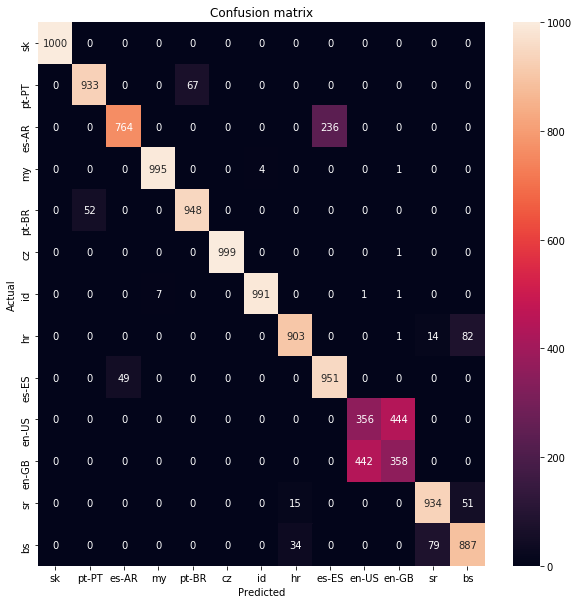

--------------------------------------------------------------------------
Confusion matrix, without normalization
[[1000    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  933    0    0   67    0    0    0    0    0    0    0    0]
 [   0    0  764    0    0    0    0    0  236    0    0    0    0]
 [   0    0    0  995    0    0    4    0    0    0    1    0    0]
 [   0   52    0    0  948    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  999    0    0    0    0    1    0    0]
 [   0    0    0    7    0    0  991    0    0    1    1    0    0]
 [   0    0    0    0    0    0    0  903    0    0    1   14   82]
 [   0    0   49    0    0    0    0    0  951    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  356  444    0    0]
 [   0    0    0    0    0    0    0    0    0  442  358    0    0]
 [   0    0    0    0    0    0    0   15    0    0    0  934   51]
 [   0    0    0    0    0    0    0   34    0    0    0   79  887]]


In [48]:
matrix_and_report(test_classes, nb_test_prediction, test_unique_class)

### Not matched sentences

In [49]:
# for sent, y_test, y_test_predict in zip(test_texts, test_classes, nb_test_prediction):
#     if y_test=="pt-PT" and y_test_predict=="es-ES":
#         print(sent + "\t" + y_test + "\t" + y_test_predict)

### Using Linear SVM: Test and make prediction of test data 

In [50]:
svm_test_prediction, svm_test_accuracy = test_data_with_model(svm_model, test_tf_idf_ngram, test_classes)

### Using Linear SVM:  Accuracy of predicted test data

In [51]:
print("Linear SVM classifier accuracy score for test set=%0.4f" % svm_test_accuracy)

Linear SVM classifier accuracy score for test set=0.8806


### Using Linear SVM:  Print Confusion matrix and classification report of test data

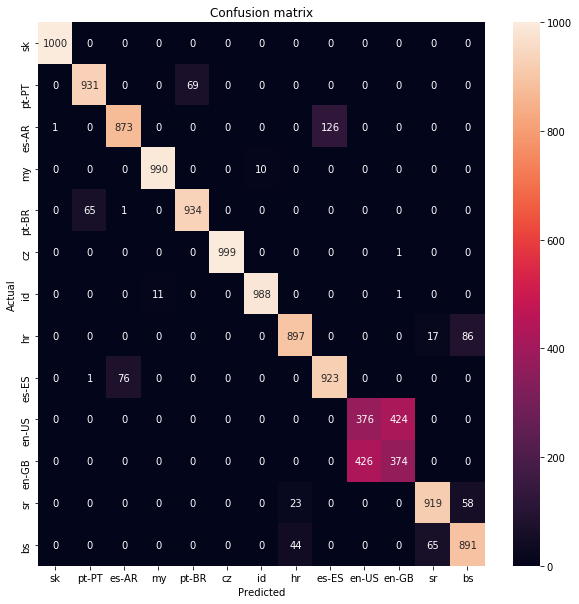

--------------------------------------------------------------------------
Confusion matrix, without normalization
[[1000    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  931    0    0   69    0    0    0    0    0    0    0    0]
 [   1    0  873    0    0    0    0    0  126    0    0    0    0]
 [   0    0    0  990    0    0   10    0    0    0    0    0    0]
 [   0   65    1    0  934    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  999    0    0    0    0    1    0    0]
 [   0    0    0   11    0    0  988    0    0    0    1    0    0]
 [   0    0    0    0    0    0    0  897    0    0    0   17   86]
 [   0    1   76    0    0    0    0    0  923    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  376  424    0    0]
 [   0    0    0    0    0    0    0    0    0  426  374    0    0]
 [   0    0    0    0    0    0    0   23    0    0    0  919   58]
 [   0    0    0    0    0    0    0   44    0    0    0   65  891]]


In [52]:
matrix_and_report(test_classes, svm_test_prediction, test_unique_class)

### Not matched sentences

In [53]:
# for sent, y_test, y_test_predict in zip(test_texts, test_classes, svm_test_prediction):
#     if y_test != y_test_predict:
#         print(sent + "\t" + y_test + "\t" + y_test_predict)

### Using Logistic Regression: Test and make prediction of test data 

In [54]:
# lr_test_prediction, lr_test_accuracy = test_data_with_model(lr_model, test_tf_idf_ngram, test_classes)

### Using Logistic Regression:  Accuracy of predicted test data

In [55]:
# print("Logistic Regression classifier accuracy score for test set=%0.4f" % lr_test_accuracy)

### Using Logistic Regression:  Print Confusion matrix and classification report of test data

In [56]:
# matrix_and_report(test_classes, lr_test_prediction, test_unique_class)